In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Extracted Files: ['images', 'About Acme AI.txt', 'www.acmeai.tech ODataset 3 - Football Semantic Segmentation.pdf', 'COCO_Football Pixel.json']
Number of Original Images: 100
Number of Label Images: 100


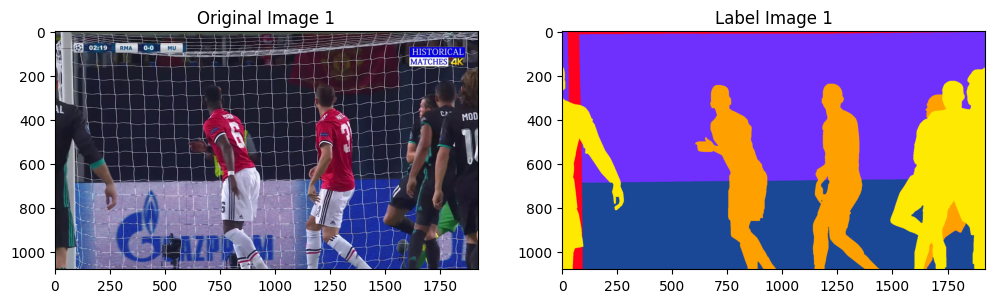

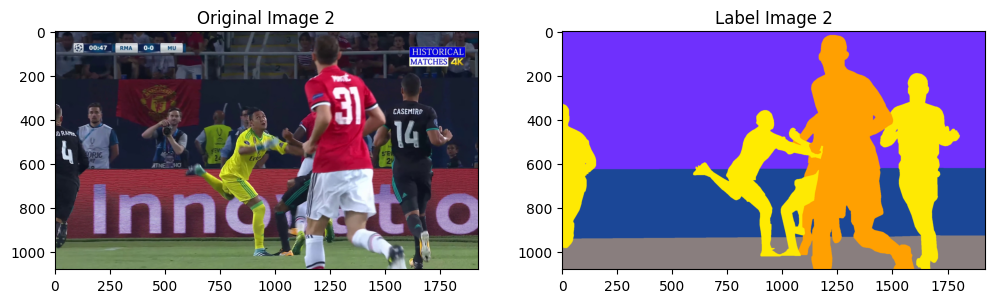

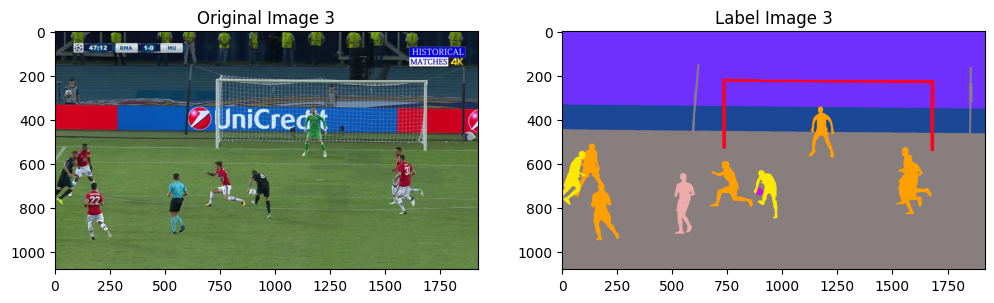

Number of Images in JSON: 100
Number of Annotations in JSON: 915
Categories in JSON: [{'id': 1393250, 'name': 'Goal Bar', 'supercategory': 'Goal Bar', 'isthing': 1, 'color': [98, 66, 21]}, {'id': 1392807, 'name': 'Referee', 'supercategory': 'Referee', 'isthing': 1, 'color': [167, 64, 21]}, {'id': 1392806, 'name': 'Advertisements', 'supercategory': 'Advertisements', 'isthing': 1, 'color': [166, 64, 21]}, {'id': 1392805, 'name': 'Ground', 'supercategory': 'Ground', 'isthing': 1, 'color': [165, 64, 21]}, {'id': 1392804, 'name': 'Ball', 'supercategory': 'Ball', 'isthing': 1, 'color': [164, 64, 21]}, {'id': 1392803, 'name': 'Coaches & Officials', 'supercategory': 'Coaches & Officials', 'isthing': 1, 'color': [163, 64, 21]}, {'id': 1392802, 'name': 'Audience', 'supercategory': 'Audience', 'isthing': 1, 'color': [162, 64, 21]}, {'id': 1392801, 'name': 'Goalkeeper B', 'supercategory': 'Goalkeeper B', 'isthing': 1, 'color': [161, 64, 21]}, {'id': 1392800, 'name': 'Goalkeeper A', 'supercategory'

In [ ]:
import zipfile
import os
import cv2
import json
import matplotlib.pyplot as plt

# Replace 'path/to/archive (3).zip' with the actual path to your zip file
zip_file_path = '/content/drive/MyDrive/DataSets/archive (3).zip'
extract_path = '/content/dataset'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the contents of the extracted folder
extracted_files = os.listdir(extract_path)
print("Extracted Files:", extracted_files)

# Read and Filter Images
image_files = sorted([f for f in os.listdir(os.path.join(extract_path, 'images')) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

original_images = []
label_images = []

for image_path in image_files:
    if "___save.png" not in image_path:
        original_image_path = os.path.join(extract_path, 'images', image_path)
        label_image_path = os.path.join(extract_path, 'images', f"{image_path}___fuse.png")

        original_img = cv2.imread(original_image_path)
        label_img = cv2.imread(label_image_path)

        if original_img is not None and label_img is not None:
            original_images.append(original_img)
            label_images.append(label_img)

# Print some results
print("Number of Original Images:", len(original_images))
print("Number of Label Images:", len(label_images))

# Display the first few images
for i in range(min(3, len(original_images))):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_images[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Original Image {i+1}")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(label_images[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Label Image {i+1}")

    plt.show()

# Read JSON File
json_file_path = os.path.join(extract_path, 'COCO_Football Pixel.json')

with open(json_file_path, 'r') as f:
    json_data = json.load(f)

# Print some key details from the JSON file
print("Number of Images in JSON:", len(json_data['images']))
print("Number of Annotations in JSON:", len(json_data['annotations']))
print("Categories in JSON:", json_data['categories'])


In [ ]:
import numpy as np
np.unique(label_images)

array([  0,   1,   3,  19,  27,  29,  48,  71, 111, 126, 137, 151, 159,
       160, 171, 201, 223, 233, 235, 238, 253, 254, 255], dtype=uint8)

In [ ]:
# Extracting unique labels/categories from the JSON file
unique_labels = set(annotation['category_id'] for annotation in json_data['annotations'])

# Mapping category IDs to category names
category_id_to_name = {category['id']: category['name'] for category in json_data['categories']}

# Print unique labels
print("Unique Labels:")
for label_id in unique_labels:
    print(f"{label_id}: {category_id_to_name.get(label_id, 'Unknown')}")


Unique Labels:
1392800: Goalkeeper A
1392801: Goalkeeper B
1392802: Audience
1393250: Goal Bar
1392804: Ball
1392805: Ground
1392806: Advertisements
1392807: Referee
1392794: Team A
1392799: Team B


In [ ]:
# Print information about original and label images arrays
print("Original Images Array:")
print(f"Number of Original Images: {len(original_images)}")
if len(original_images) > 0:
    print(f"Shape of the First Original Image: {original_images[0].shape}")

print("\nLabel Images Array:")
print(f"Number of Label Images: {len(label_images)}")
if len(label_images) > 0:
    print(f"Shape of the First Label Image: {label_images[0].shape}")


Original Images Array:
Number of Original Images: 100
Shape of the First Original Image: (1080, 1920, 3)

Label Images Array:
Number of Label Images: 100
Shape of the First Label Image: (1080, 1920, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np

NameError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam

# Function to load and preprocess images
def load_and_preprocess_images(original_images, label_images, target_size=(256, 256)):
    # Resize and preprocess images
    resized_original_images = [cv2.resize(img, target_size) for img in original_images]
    resized_label_images = [cv2.resize(img, target_size) for img in label_images]

    # Convert the lists to numpy arrays
    original_images_array = np.array(resized_original_images) / 255.0  # Normalize to [0, 1]
    label_images_array = np.array(resized_label_images)

    # Ensure label images array is 3D
    label_images_array = np.argmax(label_images_array, axis=-1)

    return original_images_array, label_images_array

# Define U-Net architecture for segmentation
def segmentation_unet_model(input_shape=(256, 256, 3), num_classes=3):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Midpoint
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)

    # Decoder
    up5 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv3], axis=-1)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(up5)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(conv5)

    up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv2], axis=-1)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(conv6)

    up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv1], axis=-1)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(conv7)

    # Output layer
    outputs = Conv2D(num_classes, 1, activation='softmax')(conv7)

    model = Model(inputs=inputs, outputs=outputs)
    return model



Epoch 1/60
5/5 [==============================] - 10s 773ms/step - loss: 2.3667 - accuracy: 0.2435 - val_loss: 2.2800 - val_accuracy: 0.4937
Epoch 2/60
5/5 [==============================] - 4s 681ms/step - loss: 2.0032 - accuracy: 0.3992 - val_loss: 1.0774 - val_accuracy: 0.5016
Epoch 3/60
5/5 [==============================] - 4s 699ms/step - loss: 0.9208 - accuracy: 0.5172 - val_loss: 0.7425 - val_accuracy: 0.5193
Epoch 4/60
5/5 [==============================] - 5s 879ms/step - loss: 0.7736 - accuracy: 0.5632 - val_loss: 0.7310 - val_accuracy: 0.5243
Epoch 5/60
5/5 [==============================] - 4s 688ms/step - loss: 0.7022 - accuracy: 0.5859 - val_loss: 0.6875 - val_accuracy: 0.5706
Epoch 6/60
5/5 [==============================] - 4s 684ms/step - loss: 0.6796 - accuracy: 0.5680 - val_loss: 0.7504 - val_accuracy: 0.5443
Epoch 7/60
5/5 [==============================] - 4s 695ms/step - loss: 0.6696 - accuracy: 0.6482 - val_loss: 0.6776 - val_accuracy: 0.6285
Epoch 8/60
5/5 [===

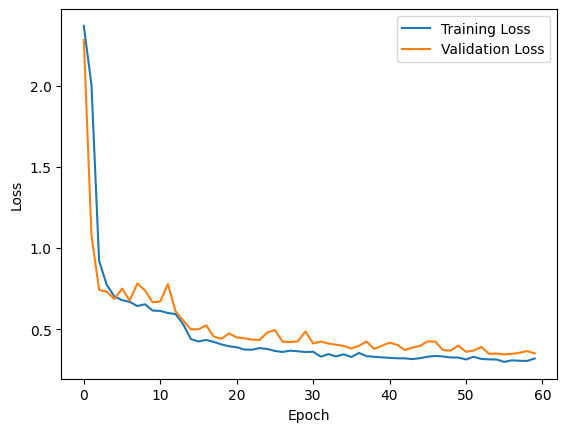

In [ ]:
# Load and preprocess images
original_images_array, label_images_array = load_and_preprocess_images(original_images, label_images)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    original_images_array, label_images_array, test_size=0.2, random_state=42
)

# Create and compile U-Net model
num_classes = 11  # Change this to the total number of classes in your dataset
model = segmentation_unet_model(input_shape=(256, 256, 3), num_classes=num_classes)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2)
datagen.fit(X_train)

import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(datagen.flow(X_train, y_train, batch_size=16), epochs=60, validation_data=(X_val, y_val))

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 [==============================] - 0s 262ms/step


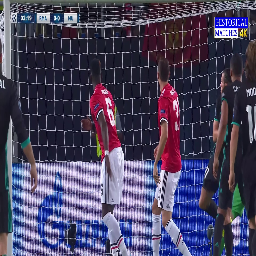

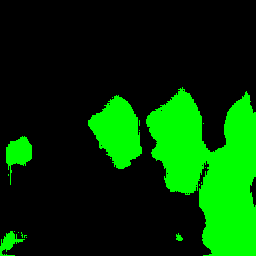

In [ ]:
from google.colab.patches import cv2_imshow

def visualize_predictions(model, new_image_path, target_size=(256, 256)):
    # Attempt to read the image
    new_image = cv2.imread(new_image_path)

    # Check if the image was successfully loaded
    if new_image is None:
        print(f"Error: Unable to read the image at {new_image_path}")
        return

    # Resize and preprocess the image
    new_image_resized = cv2.resize(new_image, target_size) / 255.0

    # Make predictions
    predictions = model.predict(np.expand_dims(new_image_resized, axis=0))

    # Create a color map for visualization
    color_map = np.array([
        [0, 0, 0],    # Class 0: Background
        [255, 0, 0],  # Class 1: Red
        [0, 255, 0],  # Class 2: Green
        # ... Add colors for other classes
    ])

    # Overlay the color maps on the original image
    segmentation_map = np.argmax(predictions[0], axis=-1)
    segmentation_color = color_map[segmentation_map]

    # Display the results using cv2_imshow
    cv2_imshow(new_image_resized * 255.0)  # Convert back to 0-255 range
    cv2_imshow(segmentation_color * 255.0)  # Convert back to 0-255 range
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Visualize predictions on a new image
new_image_path = '/content/Frame 1  (1).jpg'  # Replace with the path to your new image
visualize_predictions(model, new_image_path)


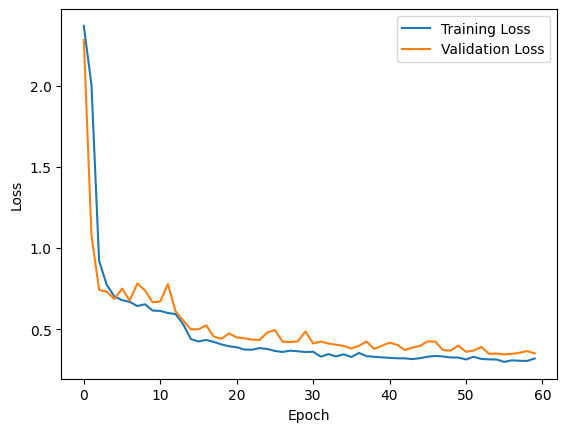

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

# Function to load and preprocess grayscale images
def load_and_preprocess_images(original_images, label_images, target_size=(256, 256)):
    # Resize and preprocess images
    resized_original_images = [cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), target_size) for img in original_images]
    resized_label_images = [cv2.resize(img, target_size) for img in label_images]

    # Convert the lists to numpy arrays
    original_images_array = np.array(resized_original_images) / 255.0  # Normalize to [0, 1]
    label_images_array = np.array(resized_label_images)

    # Ensure label images array is 3D
    label_images_array = np.expand_dims(label_images_array, axis=-1)  # Add the channel dimension

    return original_images_array, label_images_array

# Define U-Net architecture for segmentation
def segmentation_unet_model(input_shape=(256, 256, 1), num_classes=3):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Midpoint
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)

    # Decoder
    up5 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv3], axis=-1)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(up5)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(conv5)

    up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv2], axis=-1)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(conv6)

    up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv1], axis=-1)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(conv7)

    # Output layer
    outputs = Conv2D(num_classes, 1, activation='softmax')(conv7)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Load and preprocess grayscale images
original_images_array, label_images_array = load_and_preprocess_images(original_images, label_images)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    original_images_array, label_images_array, test_size=0.2, random_state=42
)

# Create U-Net model
num_classes = 11  # Change this to the total number of classes in your dataset
model = segmentation_unet_model(input_shape=(256, 256, 1), num_classes=num_classes)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2)
datagen.fit(X_train[..., np.newaxis])  # Add the channel dimension

import matplotlib.pyplot as plt

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 [==============================] - 0s 31ms/step


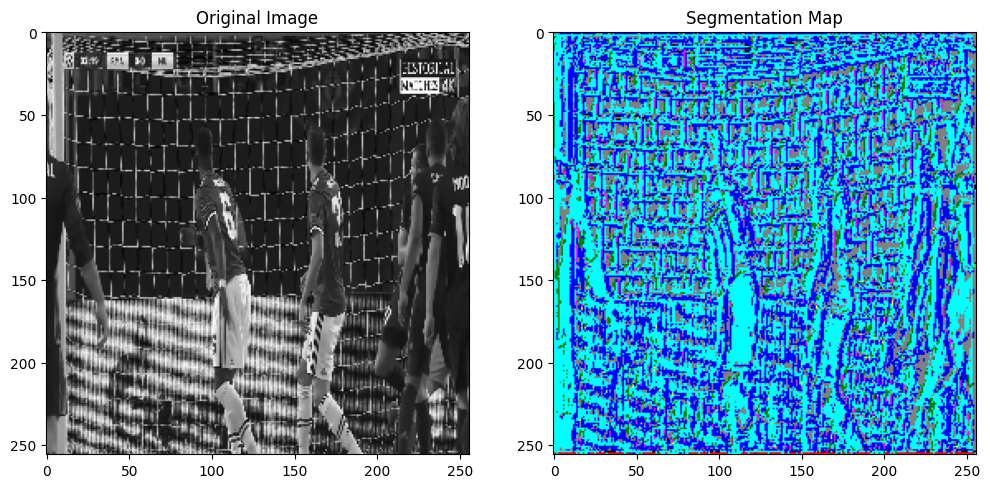

In [ ]:
import matplotlib.pyplot as plt

def visualize_predictions(model, new_image_path, target_size=(256, 256)):
    # Attempt to read the image
    new_image = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was successfully loaded
    if new_image is None:
        print(f"Error: Unable to read the image at {new_image_path}")
        return

    # Resize and preprocess the image
    new_image_resized = cv2.resize(new_image, target_size) / 255.0
    new_image_resized = np.expand_dims(new_image_resized, axis=-1)  # Add channel dimension

    # Make predictions
    predictions = model.predict(np.expand_dims(new_image_resized, axis=0))

    # Create a color map for visualization
    color_map = np.array([
      [0, 0, 0],      # Class 0: Background
      [255, 0, 0],    # Class 1: Red
      [0, 255, 0],    # Class 2: Green
      # Add colors for other classes (up to class 10)
      [255, 255, 0],  # Class 3: Yellow
      [0, 0, 255],    # Class 4: Blue
      [255, 0, 255],  # Class 5: Magenta
      [0, 255, 255],  # Class 6: Cyan
      [128, 0, 0],    # Class 7: Maroon
      [0, 128, 0],    # Class 8: Green (alternative)
      [0, 0, 128],    # Class 9: Navy
      [128, 128, 128] # Class 10: Gray
      ])

      # Overlay the color maps on the original image
    segmentation_map = np.argmax(predictions[0], axis=-1)
    segmentation_color = color_map[segmentation_map]

    # Display the results using Matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(new_image_resized[..., 0], cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(segmentation_color)
    plt.title('Segmentation Map')

    plt.show()


# Visualize predictions on a new image
new_image_path = '/content/Frame 1  (1).jpg'  # Replace with the path to your new image
visualize_predictions(model, new_image_path)


In [ ]:
import matplotlib.pyplot as plt

# Function to visualize predictions on a new image using matplotlib
def visualize_predictions_matplotlib(model, new_image_path, target_size=(256, 256)):
    # Attempt to read the image
    new_image = cv2.imread(new_image_path)

    # Check if the image was successfully loaded
    if new_image is None:
        print(f"Error: Unable to read the image at {new_image_path}")
        return

    # Resize and preprocess the image
    new_image_resized = cv2.resize(new_image, target_size) / 255.0

    # Make predictions
    predictions = model.predict(np.expand_dims(new_image_resized, axis=0))

    # Create a binary mask for people (class 1) and set everything else to black
    binary_mask = (np.argmax(predictions[0], axis=-1) == 1).astype(np.uint8)

    # Display the results using matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(new_image_resized)
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(binary_mask, cmap='gray')
    plt.title('People (Class 1)')

    plt.subplot(1, 3, 3)
    plt.imshow(new_image_resized)
    plt.imshow(binary_mask, alpha=0.5, cmap='viridis')
    plt.title('Overlay')

    plt.show()

# Visualize predictions on a new image using matplotlib
new_image_path = '/content/Frame 1  (1).jpg'  # Replace with the path to your new image
visualize_predictions_matplotlib(model, new_image_path)


InternalError: ignored